In [1]:

import numpy as np
import matplotlib

import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from scipy.stats import skewnorm
import scipy.stats as stats

x = np.random.normal(0, 2, 10000)   # create random values based on a normal distribution

matplotlib.style.use('ggplot')
%matplotlib inline

## Normal Distribution

$
\text{Probability density function (PDF) of the normal distribution is} \\
$
$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\text{, where $x\in \mathbb{R}$}
$$

The random variable $X$ described by the PDF is a normal variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

$
\text{Normal distribution notation is} \\
$
$$
X \sim N(\mu,\sigma^2) \\
$$




For a continuous function, the probability density function (pdf) is the probability that the variate has the value x. Since for continuous distributions the probability at a single point is zero, this is often expressed in terms of an integral between two points.
\begin{equation}
\int_{a}^{b} {f(x) dx} = Pr[a \le X \le b]
\end{equation}


The area under the curve equals 1.


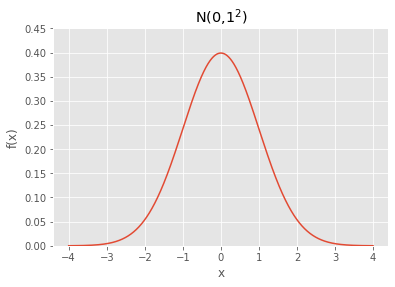

In [2]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()



mean :  0.0014981028451280913
var  :  1.0085195687805506
skew :  0.0003693998084928629
kurt :  0.06589367402042923


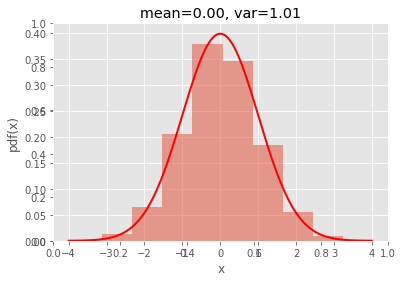

In [4]:
# RANDOM NORMAL DISTRIBUTION
fig, ax = plt.subplots()
xs = norm.rvs(scale=1,size=10000)
p = norm.pdf(x,scale=1)
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)


print("mean : ", np.mean(xs))
print("var  : ", np.var(xs))
print("skew : ",skew(xs))
print("kurt : ",kurtosis(xs))

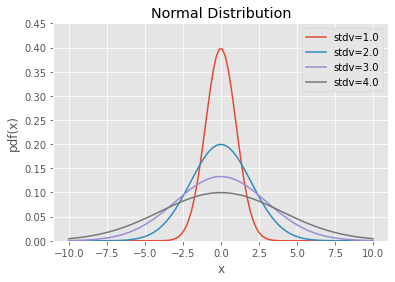

In [3]:
# DIFFERNET STD
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

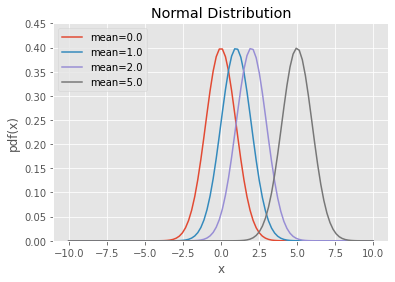

In [4]:
# DIFFERENT MEAN
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

(0.0, 0.75)

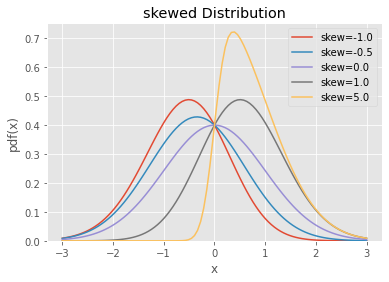

In [5]:

x = np.linspace(-3,3,100)
skews = [-1, -0.5,0, 1, 5]
fig, ax = plt.subplots()
    
for a in skews:
    ax.plot(x, skewnorm.pdf(x, a), label='skew=%.1f' % a)

   
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('skewed Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.75)


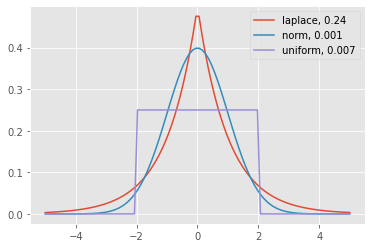

In [6]:
x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    sk = skew(data)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(sk, 3)))
    ax.legend()

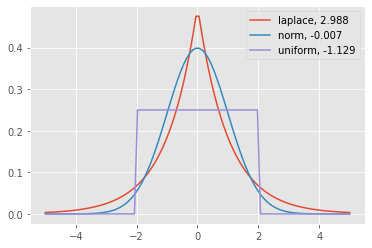

In [7]:
x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

In [28]:
def covariance(x ,y):
    mu_x = x.mean()
    mu_y = y.mean()
    co = (x- mu_x)*(y- mu_y)
    return co.sum() / x.shape[0] 

def corr(x,y):
    cov = covariance(x,y)
    return cov / (x.std() * y.std())


array([[1., 1.],
       [1., 1.]])

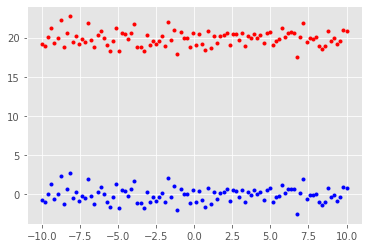

In [32]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=1,size=100)
ys = np.ones(xs.shape)
ys = (ys*20) + xs 
x= np.linspace(-10,10, 100)
ax.plot(x, xs,'b.', lw=2)
ax.plot(x,ys, 'r.', lw=2)
np.corrcoef(xs, ys)

In [34]:
covariance(xs ,ys), corr(xs,ys)

(0.92316695750719, 1.0000000000000002)

array([[ 1.        , -0.94648653],
       [-0.94648653,  1.        ]])

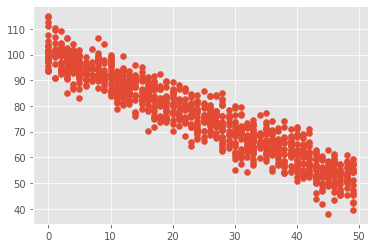

In [35]:
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)
plt.scatter(x, y)
np.corrcoef(x, y)

In [36]:
covariance(x ,y), corr(x,y)

(-212.81829994861752, -0.9464865311773175)

array([[1.        , 0.00186965],
       [0.00186965, 1.        ]])

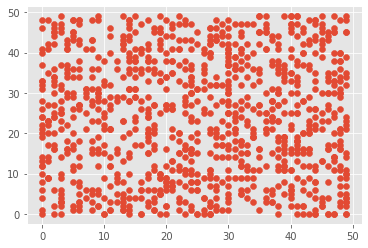

In [26]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)
plt.scatter(x, y)
np.corrcoef(x, y)

In [27]:

covariance(x ,y), corr(x,y)

(0.3990720000000001, 0.001869645595622947)